In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Import the Ames, IA housing dataset

In [3]:
train = pd.read_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

In [5]:
test = pd.read_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
test.shape

(878, 80)

Drop the `id` and `PID` columns because we don't need then for the analysis.

In [7]:
train = train.drop(columns=['Id','PID'])
test = test.drop(columns=['Id','PID'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      878 non-null    int64  
 1   MS Zoning        878 non-null    object 
 2   Lot Frontage     718 non-null    float64
 3   Lot Area         878 non-null    int64  
 4   Street           878 non-null    object 
 5   Alley            58 non-null     object 
 6   Lot Shape        878 non-null    object 
 7   Land Contour     878 non-null    object 
 8   Utilities        878 non-null    object 
 9   Lot Config       878 non-null    object 
 10  Land Slope       878 non-null    object 
 11  Neighborhood     878 non-null    object 
 12  Condition 1      878 non-null    object 
 13  Condition 2      878 non-null    object 
 14  Bldg Type        878 non-null    object 
 15  House Style      878 non-null    object 
 16  Overall Qual     878 non-null    int64  
 17  Overall Cond    

First, let's subset the training and test datasets into numerical and categorical columns.

Train numeric columns

In [9]:
train_numeric = train.select_dtypes(include=np.number)
train_numeric.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


Train categorical columns

In [10]:
train_categorical = train.select_dtypes(exclude=np.number)
train_categorical.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


Test numeric columns

In [11]:
test_numeric = test.select_dtypes(include=np.number)
test_numeric.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,190,69.0,9142,6,8,1910,1950,0.0,0,0,...,440,0,60,112,0,0,0,0,4,2006
1,90,NaN,9662,5,4,1977,1977,0.0,0,0,...,580,170,0,0,0,0,0,0,8,2006
2,60,58.0,17104,7,5,2006,2006,0.0,554,0,...,426,100,24,0,0,0,0,0,9,2006
3,30,60.0,8520,5,6,1923,2006,0.0,0,0,...,480,0,0,184,0,0,0,0,7,2007
4,20,NaN,9500,6,5,1963,1963,247.0,609,0,...,514,0,76,0,0,185,0,0,7,2009


Test categorical columns

In [12]:
test_categorical = test.select_dtypes(exclude=np.number)
test_categorical.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,NaN,Detchd,Unf,Po,Po,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New
3,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,NaN,Detchd,Unf,Fa,TA,N,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD


In [13]:
train_numeric.isna().sum()

,0
MS SubClass,0
Lot Frontage,330
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,22
BsmtFin SF 1,1
BsmtFin SF 2,1


In [14]:
test_numeric.isna().sum()

,0
MS SubClass,0
Lot Frontage,160
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,1
BsmtFin SF 1,0
BsmtFin SF 2,0


Distribution of `SalePrice`

<Axes: xlabel='SalePrice', ylabel='Count'>

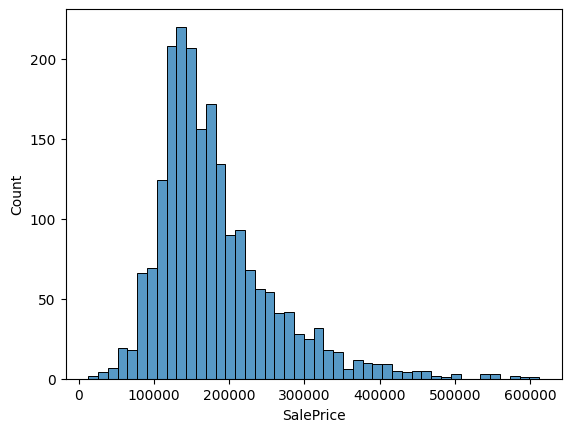

In [15]:
sns.histplot(train['SalePrice'])

In [16]:
train_numeric.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


`Lot Frontage` has a lot of missing values.  How should we best handle this?  Let's get a plot of SalePrice vs. Lot Frontage

<Axes: xlabel='Lot Frontage', ylabel='SalePrice'>

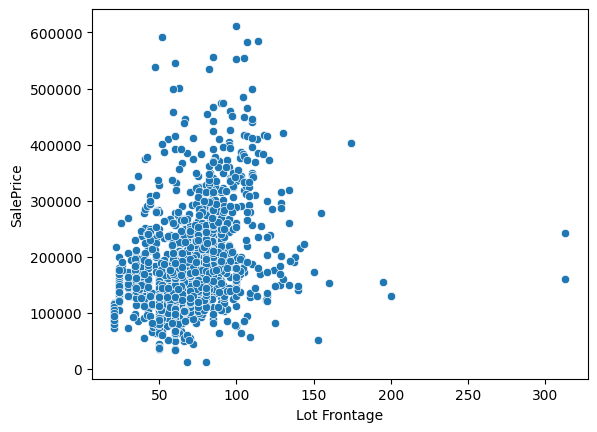

In [17]:
sns.scatterplot(data=train_numeric, x='Lot Frontage', y='SalePrice')

In [18]:
train['Lot Frontage'].mean()

69.05520046484602

Let's look at Lot Frontage vs. Lot Area

<Axes: xlabel='Lot Frontage', ylabel='Lot Area'>

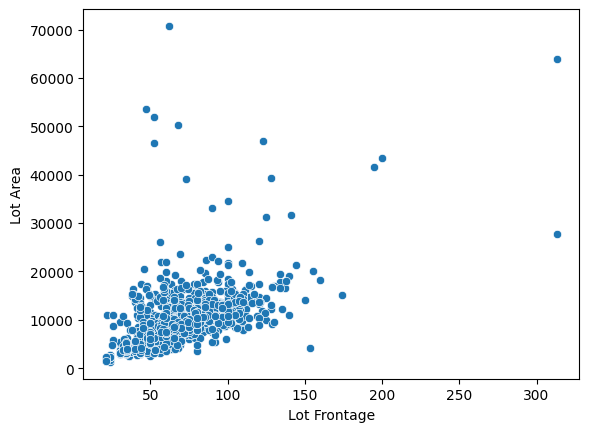

In [19]:
sns.scatterplot(data=train_numeric, x='Lot Frontage', y='Lot Area')

In [20]:
train_numeric['Lot Frontage'].corr(train_numeric['Lot Area'])

0.574024317117997

So there seems to be a reasonably good correlation between `Lot Frontage` and `Lot Area`. Create a new column to show what percent of lot area is lot frontage per row.

In [21]:
train_numeric['Lot Percentage'] = ((train_numeric['Lot Frontage']) / (train_numeric['Lot Area']))
round(train_numeric['Lot Percentage'].mean(),4)

0.0079

We see that, on average the ratio of lot frontage to lot area is 0.0079.  So we can now replace null values in lot frontage column with this heuristic.  Apply the heuristic to both the train and test datasets.

In [22]:
train_numeric['Lot Frontage'] = train_numeric['Lot Frontage'].fillna((train_numeric['Lot Area']) * 0.0079)
test_numeric['Lot Frontage'] = test_numeric['Lot Frontage'].fillna((test_numeric['Lot Area']) * 0.0079)

train_numeric = train_numeric.drop(columns=['Lot Percentage'])

Now, let's deal with  the null values within `Mas Vnr Area`.  On closer inspection of the count of unique values, we can see we have a large number of 0 values. Since we have only 22 null values present, it seems reasonable that we can set these to 0 without much issue,


In [23]:
train_numeric['Mas Vnr Area'].value_counts()

,count
Mas Vnr Area,
0.0,1216
120.0,11
176.0,10
200.0,10
108.0,9
...,...
142.0,1
215.0,1
235.0,1


In [24]:
train_numeric['Mas Vnr Area'] = train_numeric['Mas Vnr Area'].fillna(0)
test_numeric['Mas Vnr Area'] = test_numeric['Mas Vnr Area'].fillna(0)

Next we will move on to the last column with a significant amount of missing values: `Garage Yr Blt`

In [25]:
print(train_numeric['Garage Yr Blt'].mean())
print(train_numeric['Garage Yr Blt'].median())
print(test_numeric['Garage Yr Blt'].mean())
print(test_numeric['Garage Yr Blt'].median())

1978.7077955601446
1980.0
1976.7599039615845
1978.0


Let's insert 1979 into the missing vales of `Garage Yr Blt`

In [26]:
train_numeric['Garage Yr Blt'] = train_numeric['Garage Yr Blt'].fillna(1979)
test_numeric['Garage Yr Blt'] = test_numeric['Garage Yr Blt'].fillna(1979)

In [27]:
train_numeric.isna().sum()

,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,0
BsmtFin SF 1,1
BsmtFin SF 2,1


Since we now have very small numbers of null values, we can consider dropping those rows where any null value resides. It looks like we only lose 3 rows in the `train_numeric` and 0 rows in `test_numeric`.

In [28]:
train_numeric.shape, test_numeric.shape

((2051, 37), (878, 36))

In [29]:
train_numeric = train_numeric.dropna()
test_numeric = test_numeric.dropna()
train_numeric.shape, test_numeric.shape

((2048, 37), (878, 36))

In [30]:
# sns.pairplot(train_numeric, corner=True)

Lets generate a heatmap to see the highest correlations with the sales price

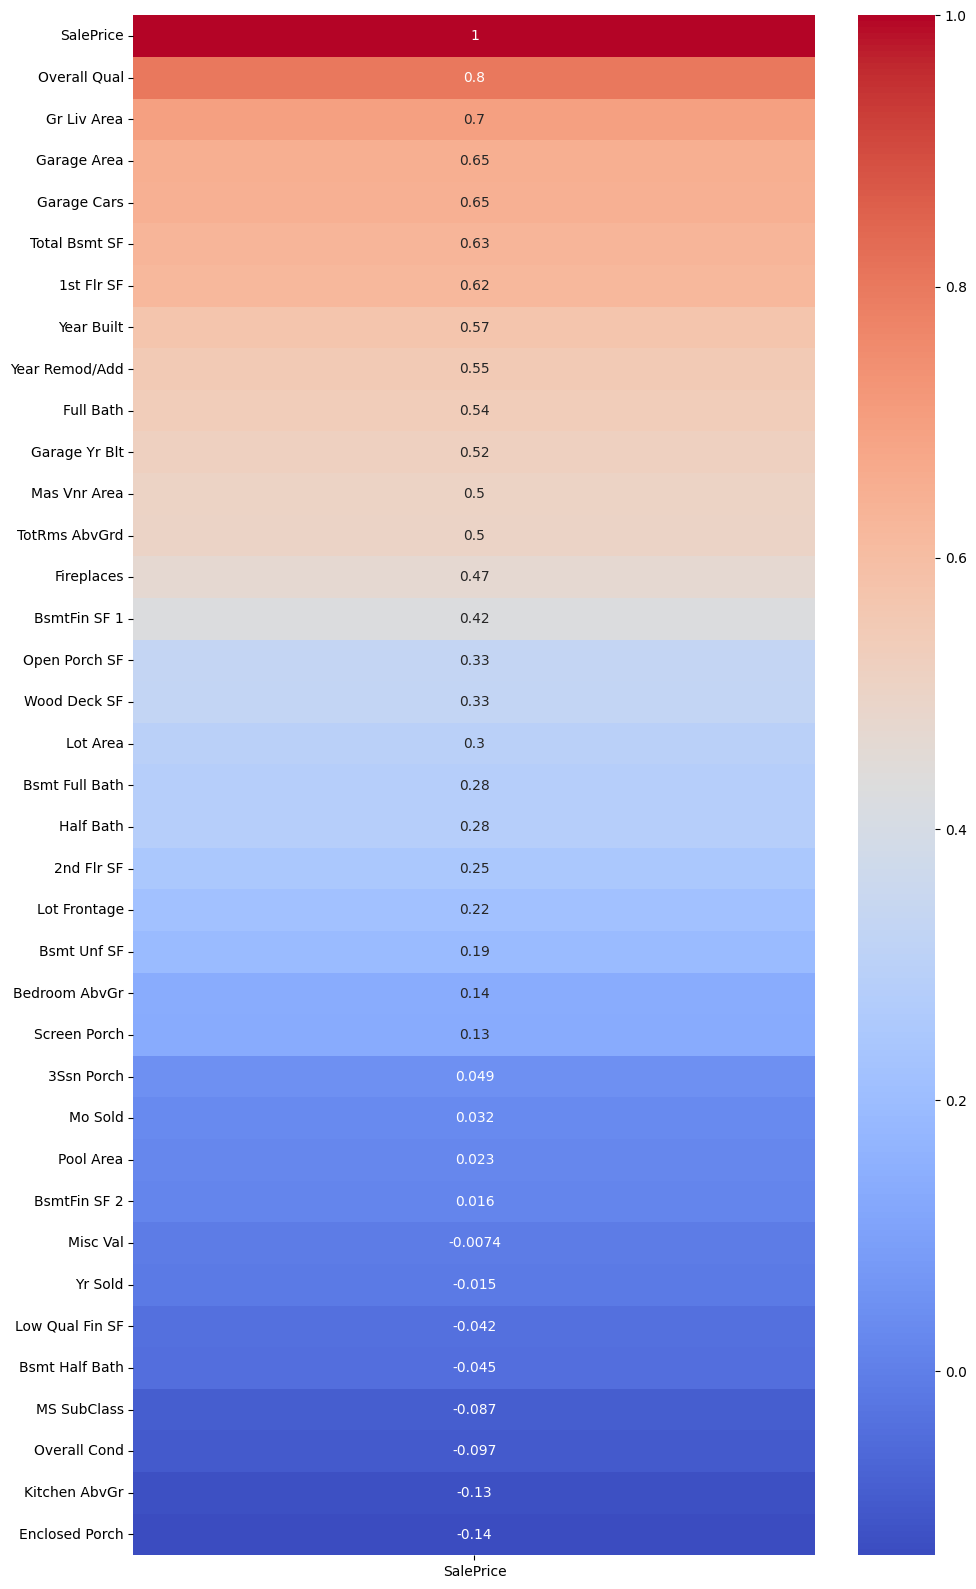

In [31]:
plt.figure(figsize = (11,20))

sns.heatmap(train_numeric.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            annot = True,
            vmax = 1,
            cmap = 'coolwarm');

In [32]:
train_numeric.to_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/train_num_cleaned.csv')
test_numeric.to_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/test_num_cleaned.csv')


### Now, let's process the categorical columns using one-hot encoding.  We use this instead of `pd.get_dummies` to ensure that both the train and test datasets are encoded in the same manner.

First, we create an instance of `OneHotEncoder`.

In [33]:
encoder = OneHotEncoder(handle_unknown='ignore')

Fit and transform on the train_categorical dataset

In [34]:
train_categorical = encoder.fit_transform(train_categorical)
train_categorical = pd.DataFrame(train_categorical.toarray(), columns=encoder.get_feature_names_out())

  #  # Transform the test data
  #  test_encoded = encoder.transform(test_df[['color']])

  #  # Convert back to dataframes (optional)
  #
  #  test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(['color']))

Fit and transform on the test_categorical dataset

In [35]:
test_categorical = encoder.transform(test_categorical)
test_categorical = pd.DataFrame(test_categorical.toarray(), columns=encoder.get_feature_names_out())

In [36]:
# train_categorical = pd.get_dummies(train.select_dtypes(include='object'), drop_first=True, dummy_na=True, dtype='float')
# train_categorical.head()

In [37]:
# test_categorical = pd.get_dummies(test.select_dtypes(include='object'), drop_first=True, dummy_na=True, dtype='float')
# test_categorical.head()

 **Note:** For modeling, we need to ensure that the train and test datasets have the same number of columns.  Therefore we need to align the coded categorical variables.

In [38]:
# train_categorical, test_categorical = train_categorical.align(test_categorical, join='outer', axis=1, fill_value=0)
# train_categorical.shape, test_categorical.shape

We need to horizontally concatenate the categorical and numeric columns in the dataset.

In [39]:
train_num_cat = pd.concat([train_numeric, train_categorical], axis=1)
train_num_cat.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Misc Feature_nan,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,60.0,106.7843,13517.0,6.0,8.0,1976.0,2005.0,289.0,533.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,60.0,43.0000,11492.0,7.0,5.0,1996.0,1997.0,132.0,637.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20.0,68.0000,7922.0,5.0,7.0,1953.0,2007.0,0.0,731.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,73.0000,9802.0,5.0,5.0,2006.0,2007.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50.0,82.0000,14235.0,6.0,8.0,1900.0,1993.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
test_num_cat = pd.concat([test_numeric, test_categorical], axis=1)
test_num_cat.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Misc Feature_nan,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,190,69.0000,9142,6,8,1910,1950,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,90,76.3298,9662,5,4,1977,1977,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,58.0000,17104,7,5,2006,2006,0.0,554,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30,60.0000,8520,5,6,1923,2006,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20,75.0500,9500,6,5,1963,1963,247.0,609,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
train_num_cat.shape, test_num_cat.shape

((2051, 304), (878, 303))

Now we can drop any rows that contain nulls in the numeric columns

In [42]:
train_num_cat.dropna(inplace=True)
test_num_cat.dropna(inplace=True)
train_num_cat.shape,test_num_cat.shape

((2048, 304), (878, 303))

Write cleaned datasets to disk


In [43]:
train_num_cat.to_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/train_num_cat_cleaned.csv')
test_num_cat.to_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Project-Home-Price-Predictions/data/test_num_cat_cleaned.csv')